In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
true_root = 14.8011359

## Function to estimate : 
$$ f(x) = \frac{9.81\times68.1}{x}[1-{\rm e}^{-(x/68.1)10}]-40$$

In [3]:
#function to be estimated
func = lambda x: ((9.81*68.1)/x)*(1-np.exp(-(x/68.1)*10))-40

## Function to estimate (Case 2) : 
$$ f(x) = x^{10}-1$$

In [4]:
#function to be estimated (2)
func2 = lambda x: (x**10)-1

## Regular Farsi Method
$$x_r = x_u - \frac{f(x_u)(x_l-x_u)}{f(x_l)-f(x_u)}$$

In [5]:
regularFarsi = lambda xl, xu, func : xu-((func(xu)*(xl-xu))/(func(xl)-func(xu)))

In [6]:
def bracketing_method(lower, upper, func, is_zero_digit=3, significant=3, max_iter=1000):
    """
    Parameter :
    - lower           = lower value for approximation
    - upper           = upper value for approximation
    - func            = function to be estimated
    - is_zero_digit   = true zero with respect < 10^-n digits
    - significant     = prefixed percent tolerance
    - max_iter        = max iteration algorithm

    Output :
    - root            = true root with respect <10^-n  digits (is_zero_digit)
    - xr              = root estimated
    - xr_array        = history when root estimating
    - ea_array        = history for error approximation
    - et_array        = history for true error approximation

    Algorithm Steps : 
    1. Choose two points xl and xu such that f(xl)*f(xr)<0
    2. Estimate the root xr using bisection method
    3. Determine which subinterval the root lies:
    """
    xl = lower
    xu = upper
    es = 0.5*10**(2-significant)
    xr = 0
    ea = 0
    et = 0
    xr_array = np.zeros(0)
    ea_array = np.zeros(0)
    ea_array = np.append(ea_array,"None")
    et_array = np.zeros(0)
    root = None
    
    if(func(xl)*func(xu)<0):
        for i in range(max_iter):
            xr = regularFarsi(xl,xu,func)
            xr_array = np.append(xr_array,xr)
            
            if(func(xl)*func(xr) < 0):
                xu = xr
            if(func(xl)*func(xr) > 0):
                xl = xr
            if(np.abs(func(xl)*func(xr)) < (10**(-is_zero_digit))):
                root = xr
            #calculate ea
            et = ((true_root-xr)/(true_root))*100
            et_array = np.append(et_array,np.round(np.abs(et),6))
            #print(xr)
            if(i>0):
                ea = ((xr_array[i]-xr_array[i-1])/(xr_array[i]))*100
                ea_array = np.append(ea_array,np.round(np.abs(ea),6))
            
            if(np.abs(ea)<es) and (i>0):
                print("iteration break at index ",i)
                break
    else:
        print("xl and xu point not recommend to start iteration")

    return root, xr, xr_array, ea_array, et_array

In [7]:
root, xr, xr_array, ea_array, et_array = bracketing_method(1,20,func,2,6,10000)
print("estimated : {}".format(xr))
print("true root : {}".format(root))

#displaying data with Pandas
df = pd.DataFrame({"xr":xr_array,"f(xr)":func(xr_array),"ea":ea_array,"et":et_array})
display(df)

iteration break at index  18
estimated : 14.80113990545107
true root : 14.80113990545107


,xr,f(xr),ea,et
0,17.332483,-4.480324,None,17.102381
1,16.019168,-2.264270,8.198394,8.229315
2,15.383534,-1.109317,4.131913,3.934819
3,15.078722,-0.535007,2.021472,1.875435
4,14.933234,-0.256048,0.974251,0.892489
5,14.863952,-0.122087,0.466108,0.424402
6,14.830996,-0.058110,0.222212,0.201742
7,14.815328,-0.027635,0.105758,0.095883
8,14.807880,-0.013137,0.050293,0.045567
9,14.804341,-0.006244,0.023908,0.021655


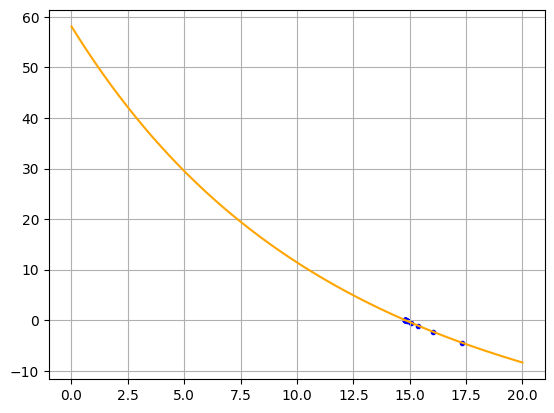

In [8]:
x = np.arange(0.001,20,0.001)
y = func(x)

plt.scatter(xr_array, func(xr_array), color = "blue", marker=".")
plt.plot(x, y, color = "orange")
plt.grid(True)


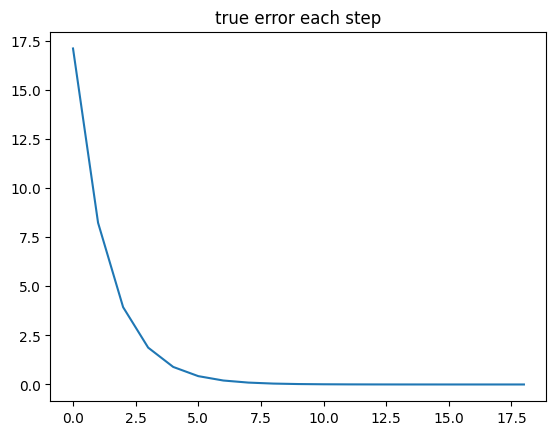

In [9]:
#true error plot
x = np.arange(0,len(et_array),1)
plt.title("true error each step")
plt.plot(x,et_array)

# Function Estimation (Case 2)

In [10]:
root, xr, xr_array, ea_array, et_array = bracketing_method(0.1,1.3,func2,2,6,10000)
print("estimated : {}".format(xr))
print("true root : {}".format(root))

#displaying data with Pandas
df = pd.DataFrame({"xr":xr_array,"f(xr)":func(xr_array),"ea":ea_array,"et":et_array})
display(df.head())

iteration break at index  57
estimated : 0.9999985423271911
true root : 0.9999985423271911


,xr,f(xr),ea,et
0,0.187046,56.765026,None,98.736274
1,0.267777,56.196328,30.148785,98.190832
2,0.342653,55.672872,21.851677,97.684956
3,0.412096,55.190799,16.85113,97.215784
4,0.476494,54.746648,13.51507,96.780693


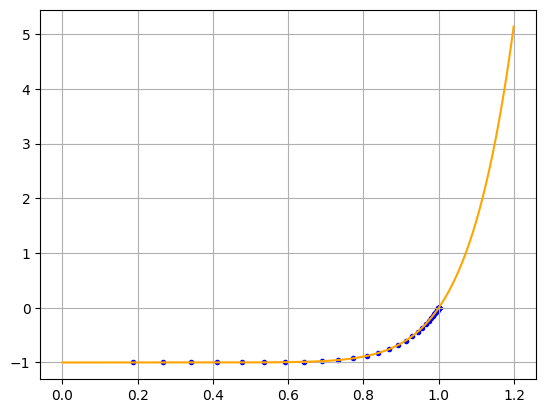

In [11]:
x = np.arange(0.001,1.2,0.001)
y = func2(x)

plt.scatter(xr_array, func2(xr_array), color = "blue", marker=".")
plt.plot(x, y, color = "orange")
plt.grid(True)

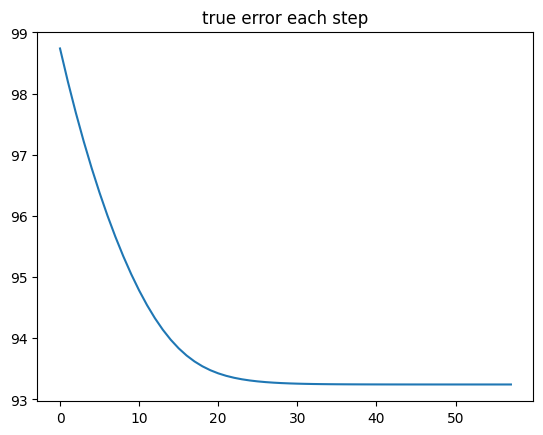

In [12]:
#true error plot
x = np.arange(0,len(et_array),1)
plt.title("true error each step")
plt.plot(x,et_array)